In [26]:
pip install -U scikit-learn scipy matplotlib



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [28]:
X,y =load_iris(return_X_y=True)
X.shape

(150, 4)

In [29]:
y.size

150

In [30]:
random_state = np.random.RandomState(0)
random_state

RandomState(MT19937) at 0x1EFC41EB940

In [31]:
n_samples, n_features = X.shape

In [32]:
n_samples

150

In [33]:
n_features

4

In [39]:
X = np.concatenate([X, random_state.randn(n_samples, 200 * n_features)], axis=1)

In [41]:
X

array([[ 5.10000000e+00,  3.50000000e+00,  1.40000000e+00, ...,
         1.03922118e+00,  3.01394218e-01,  1.04114644e+00],
       [ 4.90000000e+00,  3.00000000e+00,  1.40000000e+00, ...,
        -6.24376284e-01,  5.32108800e-01,  8.99138172e-01],
       [ 4.70000000e+00,  3.20000000e+00,  1.30000000e+00, ...,
         1.26128655e+00,  1.50964138e-01,  4.55477433e-01],
       ...,
       [ 6.50000000e+00,  3.00000000e+00,  5.20000000e+00, ...,
        -4.98952050e-01, -5.54213554e-01,  1.24024869e-03],
       [ 6.20000000e+00,  3.40000000e+00,  5.40000000e+00, ...,
         5.60060812e-01, -1.08359202e+00,  9.68434722e-01],
       [ 5.90000000e+00,  3.00000000e+00,  5.10000000e+00, ...,
         7.97708384e-01,  2.09870753e+00,  7.14544199e-01]])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X[y < 2], y[y < 2], test_size=0.5, random_state=random_state
)

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

classifier = make_pipeline(StandardScaler(), LinearSVC(random_state=random_state))
classifier.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(random_state=RandomState(MT19937) at 0x1EFC41EB940))])

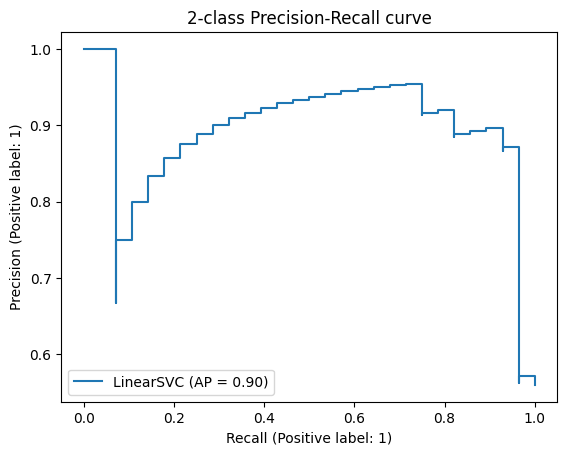

In [44]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

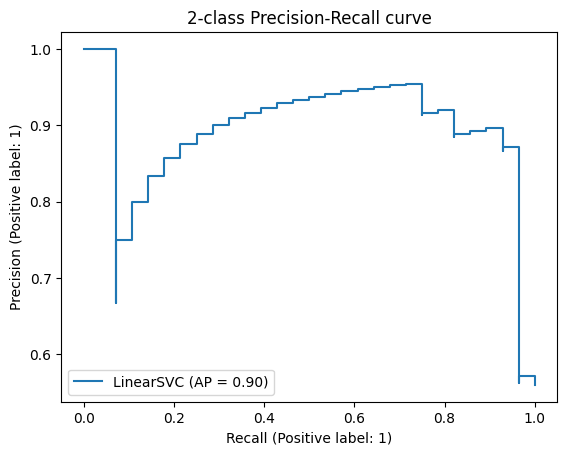

In [45]:
y_score = classifier.decision_function(X_test)

display = PrecisionRecallDisplay.from_predictions(y_test, y_score, name="LinearSVC")
_ = display.ax_.set_title("2-class Precision-Recall curve")